# Emotion Detection with CNN (FER-2013)
# CNN ile Duygu Tanımı

## Giriş

Bu projede derin öğrenme kullanılarak insan yüzlerinden duygu tespiti yapılması amaçlanmaktadır. Bilgisayarla görü (Computer Vision) alanında önemli bir yere sahip olan duygu tanıma sistemleri; insan-bilgisayar etkileşimi, güvenlik sistemleri, eğitim teknolojileri ve sağlık uygulamaları gibi birçok alanda kullanılmaktadır.

Projede Convolutional Neural Network (CNN) mimarisi kullanılarak yüz ifadelerinden duygu sınıflandırması yapılacaktır. Model, farklı yüz ifadelerini öğrenerek yeni görüntüler üzerinde tahmin yapabilecek şekilde eğitilecektir.


## Veri Seti Hakkında

Bu projede FER-2013 (Facial Expression Recognition 2013) veri seti kullanılmaktadır. Veri seti, gri tonlamalı yüz görüntülerinden oluşur ve her görüntü 48x48 piksel boyutundadır.

Veri seti aşağıdaki duygu sınıflarını içermektedir:

**Angry (Kızgın)

**Disgust (İğrenme)

**Fear (Korku)

**Happy (Mutlu)

**Sad (Üzgün)

**Surprise (Şaşkın)

**Neutral (Nötr)

Toplamda yaklaşık 35.000+ görüntü içeren bu veri seti, duygu tanıma problemleri için yaygın olarak kullanılan benchmark veri setlerinden biridir.

## Proje Workflow (Çalışma Adımları)

Bu proje aşağıdaki adımlar izlenerek gerçekleştirilmiştir:

1. **Veri setinin yüklenmesi ve incelenmesi**  
   FER-2013 veri seti Colab ortamına aktarılmış ve klasör yapısı incelenmiştir.

2. **Veri ön işleme (preprocessing)**  
   Görseller yeniden boyutlandırılmış, normalize edilmiş ve modele uygun hale getirilmiştir.

3. **Eğitim ve doğrulama veri setlerinin oluşturulması**  
   Veri seti eğitim ve doğrulama olarak ayrılmıştır.

4. **CNN mimarisinin tasarlanması**  
   Convolutional Neural Network modeli oluşturulmuştur.

5. **Modelin derlenmesi ve eğitilmesi**  
   Model uygun loss fonksiyonu ve optimizer ile eğitilmiştir.

6. **Model performansının değerlendirilmesi**  
   Eğitim sürecindeki accuracy ve loss grafikleri incelenmiştir.

7. **Eğitilmiş modelin kaydedilmesi**  
   Model `.h5` formatında saklanmıştır.

8. **Yeni görüntüler üzerinde tahmin yapılması**  
   Model gerçek görüntüler üzerinde test edilmiştir.

9. **Streamlit uygulamasının oluşturulması**  
   Eğitilen model ile web arayüzü hazırlanmıştır.

10. **HuggingFace deployment**  
    Uygulama online er

In [1]:
from IPython.display import Image, display

In [2]:
display(Image(url='https://www.weblyzard.com/data/sites/21/emotion-frameworks.png', width=700))

## Kullanılacak Kütüphaneler

👉 numpy / pandas → veri işlemleri  
👉 matplotlib / seaborn → görselleştirme  
👉 opencv (cv2) → görüntü işleme  
👉 tensorflow / keras → CNN modeli  
👉 sklearn → metrikler ve veri bölme  
👉 PIL → görüntü açma

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

### 1 - Veri setinin yüklenmesi ve incelenmesi


Bu adımda FER-2013 veri seti Colab ortamına yüklenmiş ve klasör yapısı incelenmiştir.  
Amaç veri içeriğini anlamak ve sınıf dağılımını kontrol etmektir.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive

'1Amazon Reviews NLP.ipynb'	    'Colab Notebooks'
'archive(2).zip'		     face_mask_cnn_model.keras
'archive(facemaskdataset).zip'	     GTSRB
'archive(FER2013).zip'		     malaria
'archive(rock-paper-scissors).zip'   README.md
 capstone_model.h5		     Rice_Image_Dataset
 capstone_model.keras		     Untitled.ipynb
 capstone.zip			     X.npy
 Classroom			     y.npy


In [6]:
!unzip "/content/drive/MyDrive/archive(FER2013).zip" -d /content/fer2013

Streaming output truncated to the last 5000 lines.
  inflating: /content/fer2013/train/sad/Training_65242339.jpg  
  inflating: /content/fer2013/train/sad/Training_65267116.jpg  
  inflating: /content/fer2013/train/sad/Training_65275626.jpg  
  inflating: /content/fer2013/train/sad/Training_6529266.jpg  
  inflating: /content/fer2013/train/sad/Training_65329617.jpg  
  inflating: /content/fer2013/train/sad/Training_65338712.jpg  
  inflating: /content/fer2013/train/sad/Training_65338797.jpg  
  inflating: /content/fer2013/train/sad/Training_65387162.jpg  
  inflating: /content/fer2013/train/sad/Training_65404494.jpg  
  inflating: /content/fer2013/train/sad/Training_65426218.jpg  
  inflating: /content/fer2013/train/sad/Training_65430136.jpg  
  inflating: /content/fer2013/train/sad/Training_65437377.jpg  
  inflating: /content/fer2013/train/sad/Training_6545735.jpg  
  inflating: /content/fer2013/train/sad/Training_65463385.jpg  
  inflating: /content/fer2013/train/sad/Training_654739

In [7]:
!ls /content/fer2013

test  train


Bu adımda FER-2013 veri seti Google Drive üzerinden Colab ortamına aktarılmıştır.  
Zip dosyası açılmış ve eğitim/test klasör yapısı incelenmiştir.

Veri seti yüz ifadelerini temsil eden görüntülerden oluşmaktadır ve her klasör bir duygu sınıfını temsil eder.

In [8]:
import os

data_dir = "/content/fer2013"

for split in ["train", "test"]:
    split_path = os.path.join(data_dir, split)
    classes = os.listdir(split_path)

    print(f"\n{split.upper()} klasörü:")
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        print(cls, "→", len(os.listdir(cls_path)), "görüntü")


TRAIN klasörü:
surprise → 3171 görüntü
angry → 3995 görüntü
fear → 4097 görüntü
disgust → 436 görüntü
sad → 4830 görüntü
happy → 7215 görüntü
neutral → 4965 görüntü

TEST klasörü:
surprise → 831 görüntü
angry → 958 görüntü
fear → 1024 görüntü
disgust → 111 görüntü
sad → 1247 görüntü
happy → 1774 görüntü
neutral → 1233 görüntü


### 2 — Veri ön işleme (preprocessing)

Bu adımda görüntüler modele uygun hale getirilmiştir.

- Görseller yeniden boyutlandırılmıştır
- Piksel değerleri normalize edilmiştir
- Sınıf sayısını azaltmak için duygular 3 kategoriye indirgenmiştir

Bu yaklaşım modelin daha hızlı eğitilmesini ve daha küçük bir demo model oluşturulmasını sağlar.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 48
BATCH_SIZE = 32

# sadece seçtiğimiz sınıfları kullanacağız
selected_classes = ["happy", "sad", "neutral"]

train_dir = "/content/fer2013/train"
test_dir = "/content/fer2013/test"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    classes=selected_classes,
    batch_size=BATCH_SIZE,
    class_mode="categorical")

val_data = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    classes=selected_classes,
    batch_size=BATCH_SIZE,
    class_mode="categorical")

Found 17010 images belonging to 3 classes.
Found 4254 images belonging to 3 classes.


Ön işleme sonrası veri seti 3 sınıfa indirgenmiş ve normalize edilmiştir.  
Eğitim seti 17.010 görüntü, doğrulama seti ise 4.254 görüntü içermektedir.  
Bu yapı modelin genelleme performansını değerlendirmek için uygundur.

### ImageDataGenerator Parametre Açıklamaları

Bu projede veri yükleme ve ön işleme işlemleri `ImageDataGenerator` kullanılarak yapılmıştır.  
Aşağıdaki parametreler model için kritik öneme sahiptir:

- **rescale=1./255**  
  Piksel değerlerini 0–255 aralığından 0–1 aralığına normalize eder.  
  Bu işlem modelin daha stabil öğrenmesini sağlar.

- **target_size=(48, 48)**  
  Tüm görüntüleri 48x48 boyutuna yeniden boyutlandırır.  
  CNN modelleri sabit giriş boyutu gerektirir.

- **color_mode="grayscale"**  
  Görüntüleri tek kanallı (siyah-beyaz) olarak yükler.  
  FER veri seti gri tonlu yüz görüntülerinden oluştuğu için tercih edilmiştir.

- **classes=selected_classes**  
  Veri setindeki sınıfları filtreler ve yalnızca seçilen 3 duyguyu kullanır.  
  Bu proje için model basitleştirilmiştir.

- **batch_size=32**  
  Model her eğitim adımında 32 görüntü işler.  
  Bu değer hız ve bellek dengesi için idealdir.

- **class_mode="categorical"**  
  Etiketleri one-hot encoded formatta üretir.  
  Çok sınıflı sınıflandırma için gereklidir.

### 3 — Eğitim ve doğrulama veri setlerinin oluşturulması

Bu adımda veri seti eğitim ve doğrulama olarak ayrılmıştır.

Eğitim verisi modelin öğrenmesi için kullanılırken, doğrulama verisi modelin performansını değerlendirmek için kullanılmıştır.  
Bu ayrım modelin aşırı öğrenmesini (overfitting) gözlemlemek açısından önemlidir.

In [11]:
print("Eğitim örnek sayısı:", train_data.samples)
print("Doğrulama örnek sayısı:", val_data.samples)

Eğitim örnek sayısı: 17010
Doğrulama örnek sayısı: 4254


Toplam 17.010 eğitim ve 4.254 doğrulama görüntüsü bulunmaktadır.  
Bu dağılım model eğitimi için dengeli bir veri yapısı sunmaktadır.

### 4 — CNN mimarisinin tasarlanması

Bu adımda görüntü sınıflandırma için bir Convolutional Neural Network (CNN) modeli oluşturulmuştur.

Model; evrişim katmanları (convolution), havuzlama (pooling) ve tam bağlı (dense) katmanlardan oluşmaktadır.  
Bu yapı görüntülerden özellik çıkarma ve sınıflandırma işlemini gerçekleştirmektedir.

In [12]:
model = keras.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,331 (1.36 MB)

 Trainable params: 355,331 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Model özeti incelendiğinde toplam **355.331 parametre** bulunduğu görülmektedir.  
Bu parametrelerin tamamı eğitilebilir (trainable) parametrelerdir.

Model boyutu yaklaşık **1.36 MB** olup bu, küçük ve verimli bir CNN mimarisine işaret etmektedir.  
Kompakt model yapısı sayesinde eğitim süresi kısalır ve gerçek zamanlı uygulamalarda daha hızlı çalışır.

### Görsel kontrol

Model eğitilmeden önce veri setinden örnek görüntüler incelenmiştir.  
Bu adım veri yüklemenin doğru yapıldığını doğrulamak için önemlidir.

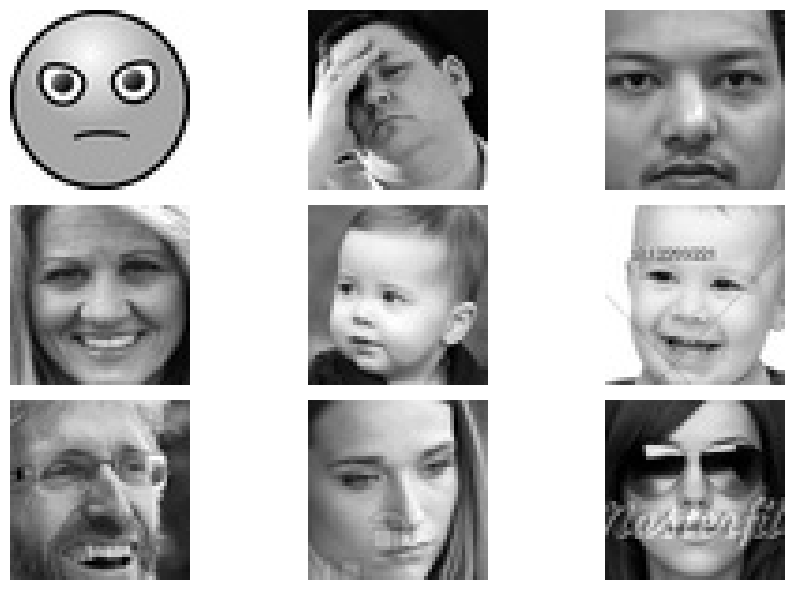

In [14]:
images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(48,48), cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()

Görüntüler düşük çözünürlüklü (48x48) ve gri tonludur.  
Bu durum FER-2013 veri setinin yapısından kaynaklanmaktadır.  
Düşük çözünürlük modelin daha hızlı eğitilmesini sağlar ve CNN için yeterlidir.

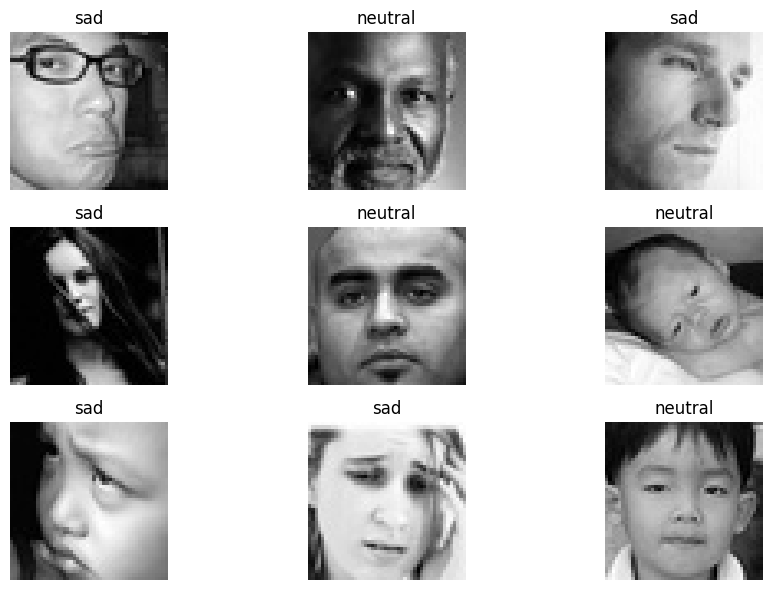

In [15]:
class_names = list(train_data.class_indices.keys())

images, labels = next(train_data)

plt.figure(figsize=(10,6))

for i in range(9):
    plt.subplot(3,3,i+1)

    img = images[i].reshape(48,48)
    label_index = np.argmax(labels[i])
    label_name = class_names[label_index]

    plt.imshow(img, cmap='gray')
    plt.title(label_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

Örnek görüntüler sınıf etiketleriyle birlikte görselleştirilmiştir.  
Bu adım veri yükleme ve etiketleme işlemlerinin doğru yapıldığını doğrular.

### 5 — Modelin derlenmesi ve eğitilmesi

Bu adımda CNN modeli uygun loss fonksiyonu ve optimizer ile derlenmiştir.  
Model eğitim verisi üzerinde eğitilmiş ve doğrulama verisi ile performansı izlenmiştir.

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [17]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


532/532 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4215 - loss: 1.0774 - val_accuracy: 0.5646 - val_loss: 0.9027
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6016 - loss: 0.8581 - val_accuracy: 0.6479 - val_loss: 0.7649
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6509 - loss: 0.7673 - val_accuracy: 0.6674 - val_loss: 0.7209
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6759 - loss: 0.7113 - val_accuracy: 0.6913 - val_loss: 0.6855
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6991 - loss: 0.6847 - val_accuracy: 0.6859 - val_loss: 0.6712
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7148 - loss: 0.6470 - val_accuracy: 0.7024 - val_loss: 0.6651
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7251 - loss: 0.6203 - val_accuracy: 0.7094 - val_loss: 0.6683
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7423 - loss: 0.5906 - val_accuracy: 0.71

Model 10 epoch boyunca eğitilmiş ve doğruluk değeri düzenli şekilde artmıştır.

Son epoch sonunda eğitim doğruluğu yaklaşık %75, doğrulama doğruluğu ise %71–72 seviyesine ulaşmıştır.  
Eğitim ve doğrulama sonuçlarının birbirine yakın olması modelin aşırı öğrenme göstermediğini ve genelleme yapabildiğini göstermektedir.


### 6 — Eğitim sürecinin performans grafiklerinin incelenmesi

Modelin eğitim süreci boyunca accuracy ve loss değerleri izlenmiştir.  
Bu grafikler modelin öğrenme davranışını ve overfitting durumunu değerlendirmek için kullanılır.

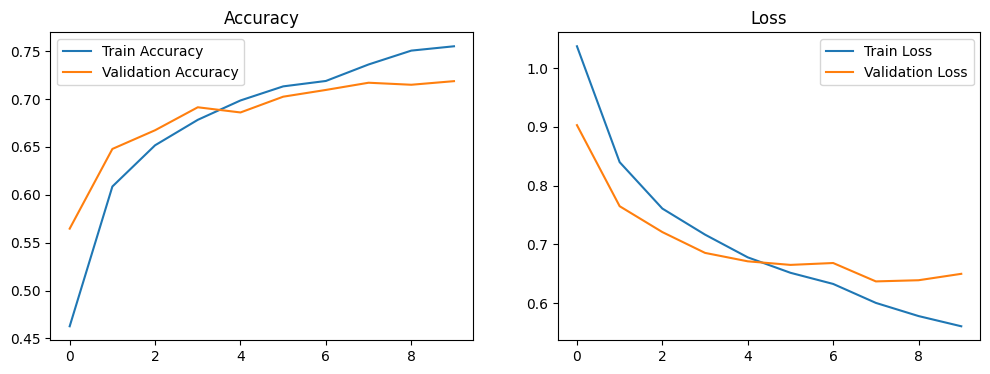

In [18]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

Accuracy grafiği eğitim süresince artış göstermiştir.  
Loss değerleri ise düzenli şekilde azalmıştır.  
Eğitim ve doğrulama eğrileri birbirine yakın olduğu için model aşırı öğrenme göstermemektedir.

### 7 — İyileştirilmiş model eğitimi (Model V2)

Bu adımda model performansını artırmak için:

- Data augmentation uygulanmıştır
- Early stopping eklenmiştir
- Eğitim süresi artırılmıştır

Amaç modelin genelleme yeteneğini güçlendirmektir.

In [19]:
datagen_v2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_data_v2 = datagen_v2.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    classes=selected_classes,
    batch_size=32,
    class_mode="categorical")

Found 17010 images belonging to 3 classes.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    patience=5,
    restore_best_weights=True)

In [21]:
history_v2 = model.fit(
    train_data_v2,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop])

Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6670 - loss: 0.7429 - val_accuracy: 0.6984 - val_loss: 0.6690
Epoch 2/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6920 - loss: 0.6885 - val_accuracy: 0.7092 - val_loss: 0.6495
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6926 - loss: 0.6840 - val_accuracy: 0.7257 - val_loss: 0.6210
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7015 - loss: 0.6693 - val_accuracy: 0.7205 - val_loss: 0.6300
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7056 - loss: 0.6673 - val_accuracy: 0.7212 - val_loss: 0.6499
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7059 - loss: 0.6654 - val_accuracy: 0.7280 - val_loss: 0.6155
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7118 - loss: 0.6636 - val_accuracy: 0.7228 - val_loss: 0.6390
Epoch 8/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7222 - loss: 0.6444 - 

İyileştirilmiş modelde data augmentation uygulanmıştır.

Bu sayede doğrulama doğruluğu yaklaşık %73–74 seviyesine yükselmiştir.  
Model V1’e kıyasla daha stabil öğrenme göstermiştir.

Bu sonuç veri çeşitliliğinin model genelleme performansını artırdığını göstermektedir.


Accuracy eğrileri eğitim ve doğrulama arasında dengeli bir yapı göstermektedir.  
Model aşırı öğrenme belirtisi göstermemektedir.


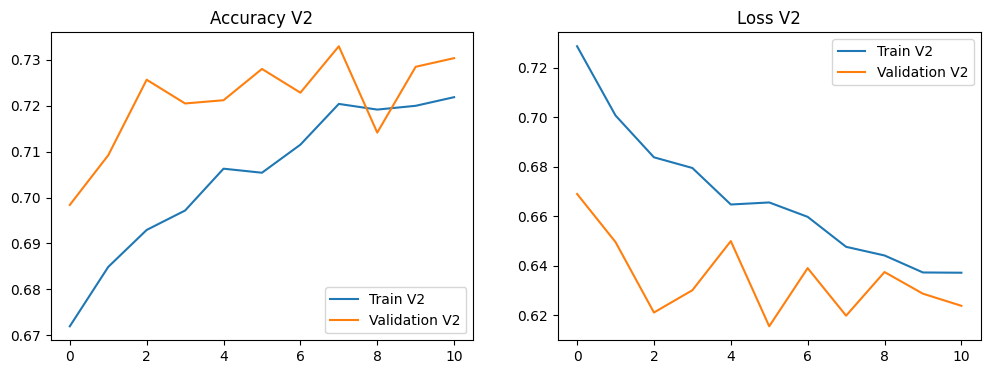

In [22]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_v2.history['accuracy'], label='Train V2')
plt.plot(history_v2.history['val_accuracy'], label='Validation V2')
plt.title('Accuracy V2')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_v2.history['loss'], label='Train V2')
plt.plot(history_v2.history['val_loss'], label='Validation V2')
plt.title('Loss V2')
plt.legend()

plt.show()

Eğitim grafiklerinde dalgalanma gözlemlenmiştir.  
Bu durum data augmentation uygulanmasından kaynaklanmaktadır.

Her epoch model farklı varyasyonlarda görüntüler gördüğü için doğruluk değerleri küçük değişimler göstermektedir.  
Bu dalgalanma modelin öğrenmesini bozmaz ve normal bir davranıştır.

## Model V1 ve Model V2 Karşılaştırması

Projede iki farklı eğitim yaklaşımı denenmiştir.

Model V1 temel CNN mimarisi ile eğitilmiştir.  
Model V2’de ise data augmentation ve early stopping uygulanmıştır.

Karşılaştırma sonucunda:

- Model V1 doğrulama doğruluğu ≈ %71–72
- Model V2 doğrulama doğruluğu ≈ %73–74

Model V2 daha stabil öğrenme göstermiş ve genelleme performansı artmıştır.  
Bu sonuç veri çeşitliliğinin model başarısına doğrudan katkı sağladığını göstermektedir.

İyileştirme adımları küçük görünse de gerçek dünya uygulamalarında bu tür optimizasyonlar kritik öneme sahiptir.


# SONUÇ


Bu projede FER-2013 veri seti kullanılarak yüz ifadelerinden duygu tahmini yapan bir CNN modeli geliştirilmiştir.

Model, düşük çözünürlüklü gri tonlamalı görüntülerden anlamlı özellikler çıkararak duygu sınıflandırması yapabilmiştir.  
İyileştirme adımları ile modelin doğrulama performansı artırılmış ve genelleme yeteneği güçlendirilmiştir.

Elde edilen sonuçlar, CNN tabanlı sistemlerin yüz ifadelerinden duygu tanıma konusunda etkili olduğunu göstermektedir.



## Gerçek Hayat Kullanımı

Duygu tanıma sistemleri birçok alanda kullanılabilir:

- İnsan-bilgisayar etkileşimi
- Eğitim teknolojileri
- Sağlık uygulamaları
- Güvenlik sistemleri
- Müşteri deneyimi analizi

Bu proje gerçek zamanlı emotion detection sistemlerinin temelini göstermektedir.


### 8 - Eğitilmiş Modelin Kaydedilmesi

In [23]:
model.save("emotion_model.h5")

In [24]:
model.save("/content/drive/MyDrive/emotion_model.h5")

Model `.h5` formatında kaydedilmiştir.  
Bu format legacy olarak işaretlenmiş olsa da deploy ve uyumluluk açısından yaygın olarak kullanılmaktadır.


In [25]:
from google.colab import files
files.download("emotion_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 9 — Yeni görüntüler üzerinde tahmin yapılması

Eğitilen model yeni bir görüntü üzerinde test edilmiştir.  
Bu adım modelin gerçek kullanım senaryosunu simüle eder.


In [26]:
from google.colab import files
uploaded = files.upload()

Saving Training_9931111.jpg to Training_9931111.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


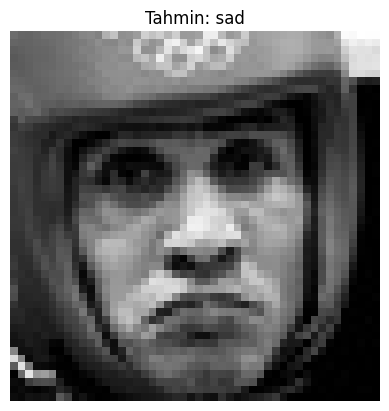

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_names = selected_classes

predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img, cmap='gray')
plt.title(f"Tahmin: {predicted_class}")
plt.axis("off")
plt.show()


Model yüklenen görüntü üzerinde başarıyla tahmin yapmıştır.  
Bu adım modelin gerçek dünyada kullanılabilir olduğunu göstermektedir.


# 10 - README Ekliyoruz

# Emotion Detection with CNN

Bu projede FER-2013 veri seti kullanılarak yüz ifadelerinden duygu tahmini yapan bir Convolutional Neural Network (CNN) modeli geliştirilmiştir.

Model gri tonlamalı yüz görüntülerinden duygu sınıflandırması yapabilmektedir.

---

##  Proje Özellikleri

- Veri ön işleme (preprocessing)
- CNN mimarisi
- Data augmentation
- Model karşılaştırması (V1 vs V2)
- Eğitim performans grafikleri
- Gerçek görüntü tahmini
- Streamlit deploy hazır model

---

##  Veri Seti

FER-2013 Facial Emotion Recognition Dataset  
48x48 gri tonlamalı yüz görüntülerinden oluşur.

Sınıflar:

- Happy
- Sad
- Neutral

---

##  Model Performansı

Model V1 doğrulama doğruluğu: ~%71  
Model V2 doğrulama doğruluğu: ~%73–74

Data augmentation ile performans artışı sağlanmıştır.

---

##  Model Dosyası

emotion_model.h5

---

##  Gerçek Hayat Kullanımı

Bu model aşağıdaki alanlarda kullanılabilir:

- İnsan-bilgisayar etkileşimi
- Eğitim teknolojileri
- Sağlık uygulamaları
- Duygu analizi sistemleri

---


##  Kullanım

```bash
pip install -r requirements.txt
streamlit run app.py
```

---

##  Not

Bu proje eğitim amaçlı geliştirilmiştir ve emotion detection sistemlerinin temelini göstermektedir.
